## Import Libraries and Functions

In [158]:
import pandas as pd
import numpy as np
import requests
import re
import string
from string import printable
import collections
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from scipy.sparse import csr_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
BOOKS_OLD_TESTAMENT = [
'Genesis', 'Exodus', 'Leviticus', 'Numbers', 'Deuteronomy', 'Joshua', 'Judges', 'Ruth',
'1 Samuel', '2 Samuel', '1 Kings', '2 Kings', '1 Chronicles', '2 Chronicles', 'Ezra', 'Nehemiah',
'Esther', 'Job', 'Psalms', 'Proverbs', 'Ecclesiastes', 'Song of Solomon', 'Isaiah', 'Jeremiah',
'Lamentations', 'Ezekiel', 'Daniel', 'Hosea', 'Joel', 'Amos', 'Obadiah', 'Jonah',
'Micah', 'Nahum', 'Habakkuk', 'Zephaniah', 'Haggai', 'Zechariah', 'Malachi'
]
BOOKS_NEW_TESTAMENT = [
'Matthew', 'Mark', 'Luke', 'John', 'Acts', 'Romans', '1 Corinthians', '2 Corinthians',
'Galatians', 'Ephesians', 'Philippians', 'Colossians', '1 Thessalonians', '2 Thessalonians', '1 Timothy', '2 Timothy',
'Titus', 'Philemon', 'Hebrews', 'James', '1 Peter', '2 Peter', '1 John', '2 John',
'3 John', 'Jude', 'Revelation'
]

In [4]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data] Downloading package omw-1.4 to /home/studio-lab-
[nltk_data]     user/nltk_data...


True

In [10]:
bible_url = 'https://bereanbible.com/bsb.txt'

In [11]:
with open('./data/bereanbible.txt', 'r') as f:
    text = f.read()

In [12]:
response = requests.get(bible_url)
raw_bible = response.text

In [13]:
bible_list = raw_bible.splitlines()

In [64]:
bible_array = np.array([item.split('\t') for item in bible_list])

In [65]:
def printable_string(text):
    # string.translate(text, string.printable)
    # text = text.translate(str.maketrans('', '', string.printable))
    # filtered_string = (filter(lambda x: x in string.printable, text))
    filtered_string = ''.join(s for s in text if s in string.printable)
    return filtered_string


bible_array[:, 1] = np.array([printable_string(verse) for verse in bible_array[:, 1]])

In [66]:
bible_array[5, 1]

'And God said, Let there be light, and there was light.'

In [96]:
bible_array.shape

(31105, 2)

In [97]:
df = pd.DataFrame(bible_array[3:, :], columns=['reference','text'])

In [98]:
df.head()

,reference,text
0,Genesis 1:1,In the beginning God created the heavens and t...
1,Genesis 1:2,"Now the earth was formless and void, and darkn..."
2,Genesis 1:3,"And God said, Let there be light, and there wa..."
3,Genesis 1:4,"And God saw that the light was good, and He se..."
4,Genesis 1:5,"God called the light day, and the darkness He ..."


In [71]:
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    4. Remove words
    '''
    stemmer = WordNetLemmatizer()
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join([i for i in nopunc if not i.isdigit()])
    nopunc = [word.lower() for word in nopunc.split() if word not in stopwords.words('english')]
    return [stemmer.lemmatize(word) for word in nopunc]

In [87]:
tfidfconvert = TfidfVectorizer(analyzer=text_process).fit(bible_array[3:,1])
tfidf_text = tfidfconvert.transform(bible_array[3:,1])
df_vocab = pd.DataFrame(index=None,
                        data=zip(tfidfconvert.vocabulary_.keys(),
                                 tfidfconvert.vocabulary_.values()),
                        columns=['word', 'index']).sort_values('index')
tfidf_df = pd.DataFrame(csr_matrix.todense(tfidf_text), columns=df_vocab.word)

In [90]:
tfidf_df.shape

(31102, 13879)

In [74]:
tfidf_df.head()

word,a,aaron,abaddon,abagtha,abanah,abandon,abandoned,abandoning,abarim,abba,...,zophim,zorah,zorathites,zorites,zuar,zuph,zur,zuriel,zurishaddai,zuzites
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
tfidf_df.describe()

word,a,aaron,abaddon,abagtha,abanah,abandon,abandoned,abandoning,abarim,abba,...,zophim,zorah,zorathites,zorites,zuar,zuph,zur,zuriel,zurishaddai,zuzites
count,31105.000000,31105.000000,31105.000000,31105.000000,31105.000000,31105.000000,31105.000000,31105.000000,31105.000000,31105.000000,...,31105.000000,31105.000000,31105.000000,31105.000000,31105.000000,31105.000000,31105.000000,31105.000000,31105.000000,31105.000000
mean,0.006169,0.003100,0.000107,0.000010,0.000012,0.000281,0.000494,0.000012,0.000069,0.000047,...,0.000013,0.000134,0.000021,0.000013,0.000075,0.000034,0.000058,0.000015,0.000073,0.000011
std,0.036373,0.031074,0.007201,0.001721,0.002194,0.010292,0.013112,0.002193,0.005453,0.004834,...,0.002304,0.007612,0.002655,0.002319,0.006051,0.003485,0.004706,0.002618,0.005881,0.001914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.434450,0.699952,0.567489,0.303476,0.387030,0.557633,0.610992,0.386761,0.486074,0.567838,...,0.406426,0.535302,0.337861,0.408977,0.622154,0.424455,0.466501,0.461749,0.601265,0.337627


In [91]:
pca_model = PCA(n_components=2)
pca_array = pca_model.fit_transform(tfidf_df)

In [92]:
pca_array.shape

(31102, 2)

In [99]:
df['pca_1'] = pca_array[:,0]
df['pca_2'] = pca_array[:,1]

In [135]:
def book_split(text):
    book = text.split(' ')
    return' '.join(book[0:len(book)-1])
df['book'] = df['reference'].apply(book_split)
df['testament'] = df['book'].apply(lambda x: 'OT' if x in BOOKS_OLD_TESTAMENT else 'NT')

<AxesSubplot: xlabel='pca_1', ylabel='pca_2'>

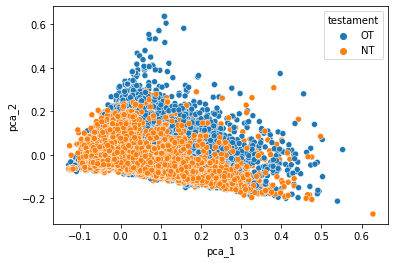

In [136]:
sns.scatterplot(data=df, x='pca_1', y='pca_2', hue='testament')

In [153]:
books_df = df[['pca_1', 'pca_2', 'book', 'testament']].groupby(['testament','book']).mean()

In [154]:
books_df = books_df.reset_index(level=[0,1])

<AxesSubplot: xlabel='pca_1', ylabel='pca_2'>

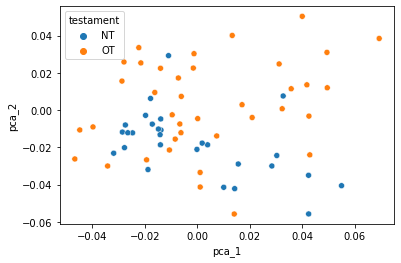

In [155]:
sns.scatterplot(data=books_df, x='pca_1', y='pca_2', hue='testament')

In [156]:
def scatter_text(x, y, text_column, data, title, xlabel, ylabel):
    """Scatter plot with country codes on the x y coordinates
       Based on this answer: https://stackoverflow.com/a/54789170/2641825"""
    # Create the scatter plot
    p1 = sns.scatterplot(data=data, x=x, y=y, size = 8, legend=False)
    # Add text besides each point
    for line in range(0,data.shape[0]):
         p1.text(data[x][line]+0.01, data[y][line], 
                 data[text_column][line], horizontalalignment='left', 
                 size='medium', color='black', weight='semibold')
    # Set title and axis labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return p1

<AxesSubplot: title={'center': 'books of the bible'}, xlabel='pca_1', ylabel='pca_2'>

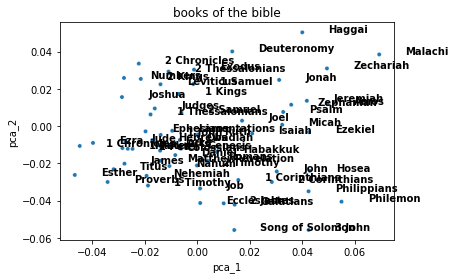

In [159]:
scatter_text(x='pca_1', y='pca_2',
             text_column='book', data=books_df,
             title='books of the bible',
             xlabel='pca_1', ylabel='pca_2')